In [4]:
from pySMOKEPostProcessor import PostProcessor
from pySMOKEPostProcessor import plot_bars
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Rate Of Production Analysis

As for the Sensitivity Analysis and the Flux Analysis first of all call the constructor of the Post Processor then acces the function to compute the Rate Of Prouction Analysis.

**Global Rate Of Production Analysis**: the most important reactions are automatically selected on the whole computational domain, by looking at the absolute value of the peak.
> * `kinetic_folder` ( *string* ): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
> * `output_folder` ( *string* ): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the computation of the Rate Of Production only the file named **Output.xml** is required.
> * `species` ( *string* ): the name of the specie on which the ROPA is wanted.
> * `ropa_type` ( *string* ): select the types of ROPA available. Three types settings are available "global", "local" and "region".
> * `number_of_reactions` ( *int* default: 10 ): number of reactions to be analyzed.
    
**Local Rate Of Production Analysis**: the most important reactions are automatically selected by looking at the absolute value of the peak only in the location specified by the user.
    
> * `local_value` ( *float* ): value to specify, on the computational domain, where to selected the most important reactions.
    
**Region Rate Of Production Analysis**: the most important reactions are automatically selected by looking at the absolute value of the peak only in the region specified by the user.
    
> * `lower_value` ( *float* ): value of the lower bound of the region, of the computational domain, where to selct the most important reactions.
> * `upper_value` ( *float* ): value of the upper bound of the region, of the computational domain, where to selct the most important reactions.
 
Function Rate Of Production Analysis (**`RateOfProductionAnalysis`**) will return a dictionary:
> * `coefficients`: The list containing the coefficient of each selected reaction.
> * `indices`: The list of the indices of each selected reaction inside the mechanism (0-based).
> * `reactions`: The list containing the names of the selected reactions (plotting purposes).

## Global Rate Of Production Analysis

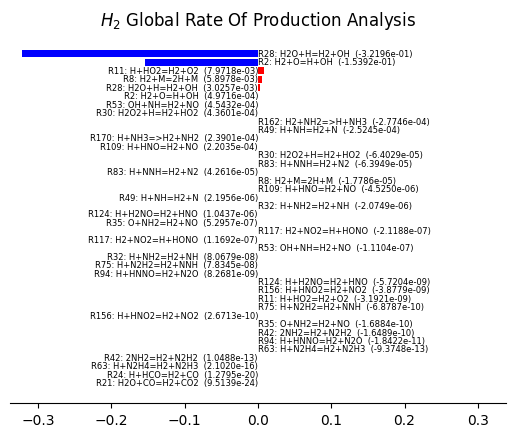

In [2]:
kineticFolder = os.path.join("..", "data", "ROPA-01", "kinetics")
resultsFolder = os.path.join("..", "data", "ROPA-01", "Output")

pp = PostProcessor(kineticFolder, resultsFolder)

ropa_results = pp.RateOfProductionAnalysis(
                                        species='H2',
                                        ropa_type='global',
                                        number_of_reactions = 40)
# dic with coeffiecients, reaction_names, reaction indices
df = pd.DataFrame(ropa_results)

fig, ax = plot_bars(df)
ax.set_title("$H_{2}$ Global Rate Of Production Analysis")
plt.show()

## Local Rate Of Production Analysis

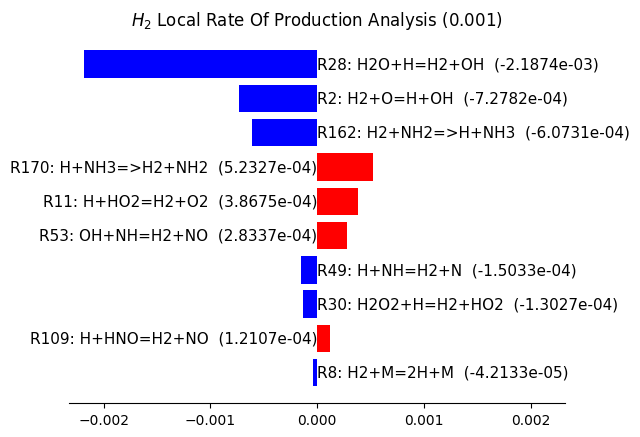

In [3]:
ropa_results = pp.RateOfProductionAnalysis(
                                        species='H2',
                                        ropa_type='local',
                                        local_value= 0.001)
# dic with coeffiecients, reaction_names, reaction indices
df = pd.DataFrame(ropa_results)

fig, ax = plot_bars(df)
ax.set_title("$H_{2}$ Local Rate Of Production Analysis (0.001)")
plt.show()

## ROPA -region

In [6]:
species = "H2"
upper = 0.0005
lower = 0.0009
nrxns = 15

ropa_results = pp.RateOfProductionAnalysis(species=species,
                                                           ropa_type='region',
                                                           lower_value = upper, 
                                                           upper_value = lower, 
                                                           number_of_reactions = nrxns)
df = pd.DataFrame(ropa_results)
df.head()


,coefficients,reaction_names,reaction_indices
0,0.005417,R28: H2O+H=H2+OH,27
1,0.000966,R2: H2+O=H+OH,1
2,0.000859,R53: OH+NH=H2+NO,52
3,-0.000465,R49: H+NH=H2+N,48
4,0.000407,R109: H+HNO=H2+NO,108


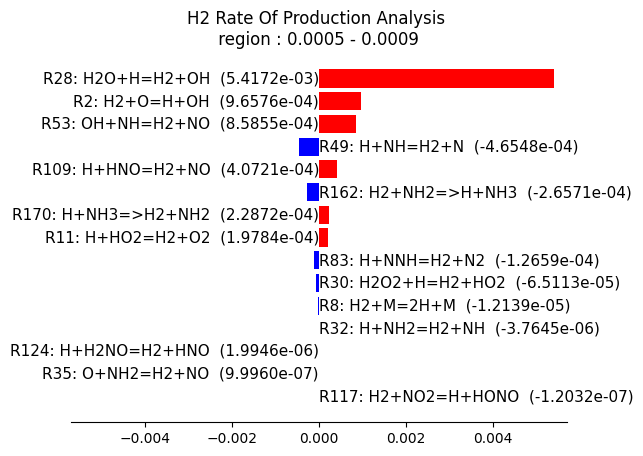

In [7]:

# plot
title = "{} Rate Of Production Analysis \n region : {} - {} ".format(species, upper, lower)
fig, ax = plot_bars(df)
ax.set_title(title)
plt.show()

## add example with mass ropa AN